#### 4. Load following dataset into pandas: https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv 

##### 1. Check how data is distributed for numerical columns.


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url="https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


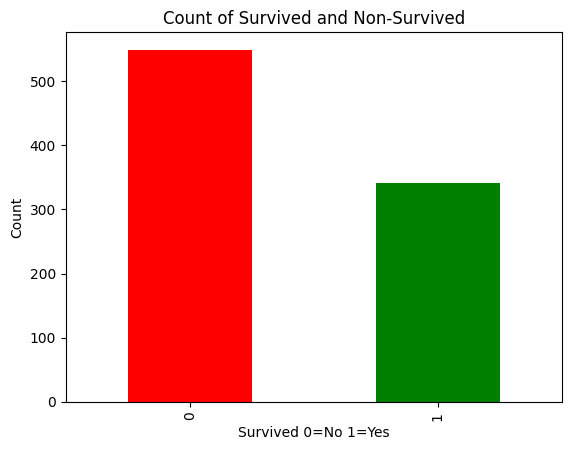

In [26]:
plt.Figure(figsize=(9,3))
survival_count=df['Survived'].value_counts()
survival_count.plot(kind='bar',color=['red','green'])
plt.xlabel('Survived 0=No 1=Yes')
plt.ylabel('Count')
plt.title("Count of Survived and Non-Survived")
plt.show()

In [29]:
corellation=df.corr(numeric_only=True)
print(corellation)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<Axes: >

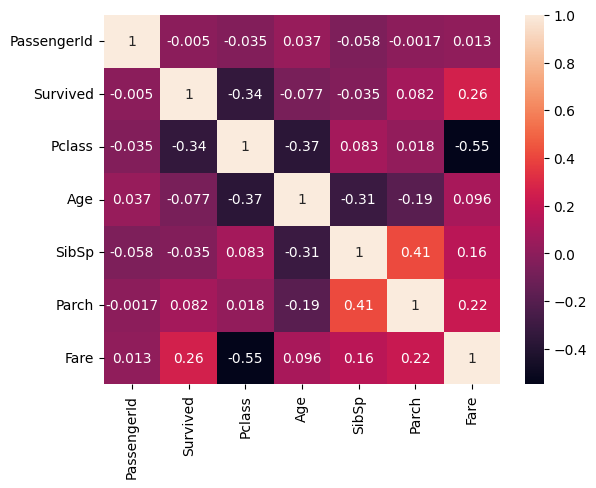

In [35]:
sns.heatmap(corellation,annot=True)

In [70]:
fare_correlation = corellation['Fare'].sort_values(ascending=False)
most_infurencing_column=fare_correlation.head(2)
most_infurencing_column

Fare        1.000000
Survived    0.257307
Name: Fare, dtype: float64

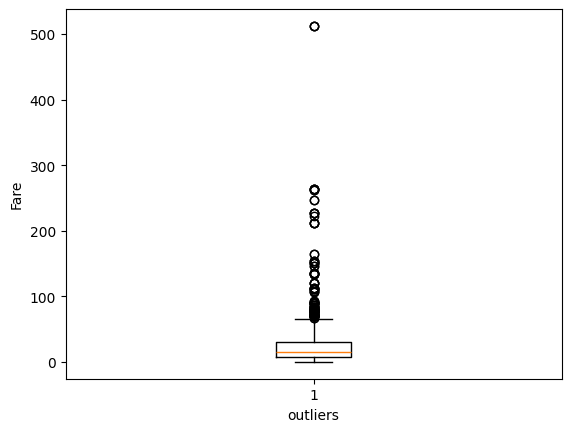

In [42]:
plt.boxplot(df['Fare'])
plt.xlabel('outliers')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Embarked'>

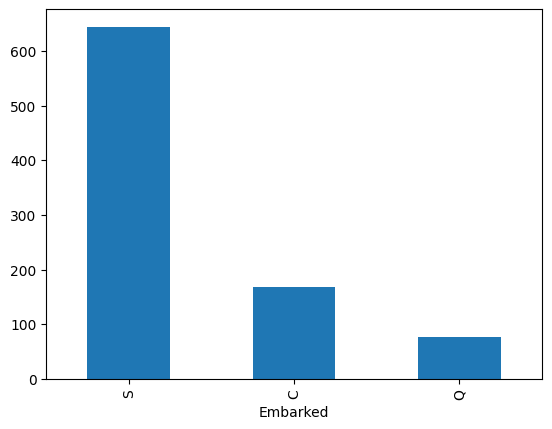

In [59]:
embarked=df['Embarked'].value_counts()
embarked.plot(kind='bar')

In [54]:
survival_per_class=df.groupby('Pclass')['Survived'].mean()
print(survival_per_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


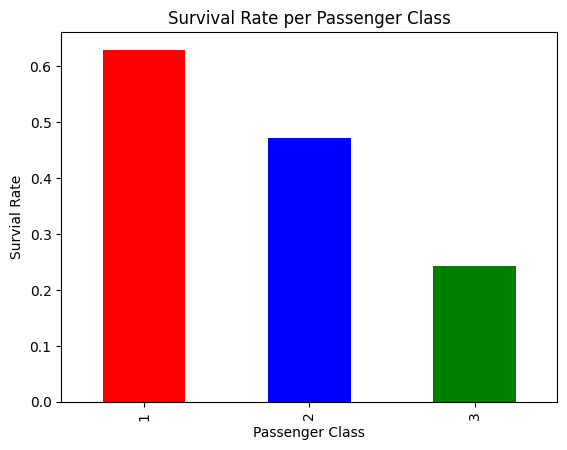

In [65]:
survival_per_class.plot(kind='bar', color=['red','blue','green'])
plt.title('Survival Rate per Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survial Rate')
plt.show()

In [61]:
age_bin=[0,10,20,30,40,50,60,70,80,90,100]
age_lable=['0-10','10-20','20-30','30-40','40-50','51-60', '61-70', '71-80', '81-90','90-100']
df['AgeGroup']=pd.cut(df['Age'],bins=age_bin,labels=age_lable,right=False)
df['AgeGroup']

0      20-30
1      30-40
2      20-30
3      30-40
4      30-40
       ...  
886    20-30
887    10-20
888      NaN
889    20-30
890    30-40
Name: AgeGroup, Length: 891, dtype: category
Categories (10, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '61-70' < '71-80' < '81-90' < '90-100']

C:\Users\VipulGhodke\AppData\Local\Temp\ipykernel_18680\1819889809.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_per_ageGroup=df.groupby('AgeGroup')['Survived'].mean()


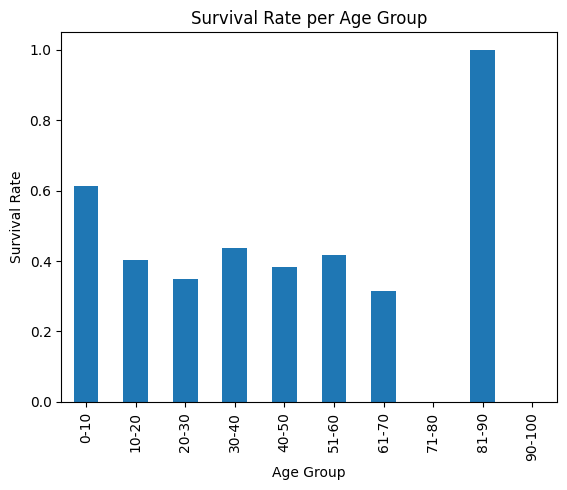

In [64]:
survival_rate_per_ageGroup=df.groupby('AgeGroup')['Survived'].mean()
survival_rate_per_ageGroup.plot(kind='bar')
plt.title('Survival Rate per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()